In [45]:
import pandas as pd
import numpy as np
import os
import re
import geopandas
import geoplot
import matplotlib.pyplot as plt
%matplotlib inline

# Plot of Syria and locations

- data of shapefile is from 'https://data.humdata.org/dataset/syrian-arab-republic-administrative-boundaries-populated-places'

In [56]:
# import csv lat long file
fname = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/03.geolocation_syria/01.exploration.001.4.IMPACT_locations.with_long_lat.csv'
data = pd.read_csv(fname, index_col=0)
data.sample(6)

town_location_code gov_code distr_code sdistr_code  gov_name   distr_name  \
218              C6116     SY12     SY1203    SY120302     Dar'a        Izra'   
178              C5735     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
47               C2227     SY02     SY0208    SY020800    Aleppo     Jarablus   
84               C3932     SY07     SY0700    SY070004     Idleb        Idleb   
234              C6512     SY11     SY1102    SY110200  Ar-Raqqa   Tell Abiad   
7                C1121     SY02     SY0200    SY020003    Aleppo  Jebel Saman   

    sdistr_name     town_location_name       long        lat  
218        Hrak                   Hrak  36.303963  32.750677  
178    Ar-Raqqa  Kisret Elsheikh Jomaa  38.964265  35.906174  
47     Jarablus               Jarablus  38.009919  36.814478  
84      Teftnaz                Teftnaz  36.783251  35.997737  
234  Tell Abiad         Aljern Alaswad  38.719372  36.679681  
7       Haritan                  Andan  37.044294  36.292225

In [57]:
data = data[data['sdistr_code'].str.startswith('SY11')]
data

town_location_code gov_code distr_code sdistr_code  gov_name   distr_name  \
168              C5681     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
169              C5683     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
170              C5689     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
171              C5699     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
172              C5702     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
173              C5703     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
174              C5710     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
175              C5729     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
176              C5730     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
177              C5731     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
178              C5735     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
179              C5747     SY11     SY1101    SY110101  Ar-Raqqa     Ar-Raqqa   
180              C5765     SY11     SY1101    SY110102  Ar-Raqqa     Ar-Raqqa   
181              C5766     SY11     SY1101    SY110102  Ar-Raqqa     Ar-Raqqa   
182              C5787     SY11     SY1101    SY110103  Ar-Raqqa     Ar-Raqqa   
183              C5792     SY11     SY1102    SY110200  Ar-Raqqa   Tell Abiad   
184              C5801     SY11     SY1102    SY110200  Ar-Raqqa   Tell Abiad   
185              C5820     SY11     SY1102    SY110200  Ar-Raqqa   Tell Abiad   
186              C5843     SY11     SY1102    SY110201  Ar-Raqqa   Tell Abiad   
187              C5905     SY11     SY1102    SY110202  Ar-Raqqa   Tell Abiad   
188              C5912     SY11     SY1102    SY110202  Ar-Raqqa   Tell Abiad   
189              C5927     SY11     SY1102    SY110202  Ar-Raqqa   Tell Abiad   
190              C5929     SY11     SY1103    SY110300  Ar-Raqqa  Ath-Thawrah   
191              C5942     SY11     SY1103    SY110301  Ar-Raqqa  Ath-Thawrah   
192              C5965     SY11     SY1103    SY110302  Ar-Raqqa  Ath-Thawrah   
193              C5968     SY11     SY1103    SY110302  Ar-Raqqa  Ath-Thawrah   
233              C6319     SY11     SY1102    SY110201  Ar-Raqqa   Tell Abiad   
234              C6512     SY11     SY1102    SY110200  Ar-Raqqa   Tell Abiad   
235              C6514     SY11     SY1102    SY110200  Ar-Raqqa   Tell Abiad   
243              N0465     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
244              N0466     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
245              N0468     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
246              N0469     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
247              N0470     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
248              N0471     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
249              N0472     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
250              N0476     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
251              N0477     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
252              N0478     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
253              N0479     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   
254              N0481     SY11     SY1101    SY110100  Ar-Raqqa     Ar-Raqqa   

    sdistr_name        town_location_name       long        lat  
168    Ar-Raqqa     Sukariyet Tal Elsamen  38.964857  36.179961  
169    Ar-Raqqa                     Kalta  39.014790  36.179484  
170    Ar-Raqqa        Tal Elsamen Dahham  38.973401  36.227220  
171    Ar-Raqqa             Raeqqet Samra  39.091572  35.931874  
172    Ar-Raqqa                   Hazimeh  38.965906  36.131489  
173    Ar-Raqqa                    Hettin  38.972814  35.996696  
174    Ar-Raqqa                  Ar-Raqqa  39.006062  35.953075  
175    Ar-Raqqa                   Andalus  38.738126  35.992042  
176    

In [58]:
from shapely.geometry import Point # Shapely for converting
# creating a geometry column 
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# crs = {'init':'epsg:3395'}

# Creating a Geographic data frame 
gdf = geopandas.GeoDataFrame(data, crs=crs, geometry=geometry)

In [59]:
shapefile = '/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/03.geolocation_syria/syr_admin_shp_utf8_19321/syr_admin2.shp'
syria = geopandas.read_file(shapefile)
# syria = geopandas.read_file('/Users/hkromer/01_Projects/15.Hack4Good2019/02.Data/03.geolocation_syria/syr_admin_shp_utf8_19321/syr_pplp_adm4_unocha.shp')

# ax = syria.plot()
geoplot.polyplot(syria, edgecolor='darkgray', figsize=(20, 20))
ax = plt.gca()
# print(ax.get_ylim())
ax.set_xlim([35,45])
ax.set_ylim([32,38])
# print(ax.get_ylim())
gdf.plot(ax=ax, marker='*', markersize=2, color='red')
plt.show()

In [7]:
syria


0     POLYGON ((36.21236746000005 33.53933660300004,...
1     POLYGON ((37.30979408600007 36.37662853000006,...
2     POLYGON ((37.65069389400003 36.64033699000004,...
3     POLYGON ((36.89760398800007 36.77849769600004,...
4     POLYGON ((37.36082649200006 36.65404319800007,...
                            ...                        
57    POLYGON ((37.46432706200005 32.66404023200005,...
58    POLYGON ((36.88491481000005 33.05645093200008,...
59    POLYGON ((35.85662269600004 33.32740974400008,...
60    POLYGON ((35.64697456400006 32.94416999800006,...
61    POLYGON ((36.04468840300007 35.22697153400003,...
Name: geometry, Length: 62, dtype: object

# Explore geopandas

town_location_code gov_code distr_code sdistr_code     gov_name  \
144              C4477     SY08     SY0800    SY080004   Al-Hasakeh   
42               C1971     SY02     SY0206    SY020600       Aleppo   
102              C4052     SY07     SY0702    SY070203        Idleb   
220              C6118     SY12     SY1203    SY120302        Dar'a   
97               C3980     SY07     SY0702    SY070200        Idleb   
159              C5100     SY09     SY0901    SY090101  Deir-ez-Zor   

      distr_name                sdistr_name             town_location_name  \
144   Al-Hasakeh  Be'r Al-Hulo Al-Wardeyyeh                       Tal Brak   
42   Ain Al Arab                Ain al Arab    Ghassaniyeh - Qorret Halanj   
102     Al Ma'ra                 Kafr Nobol             Faqie (Kafr Nobol)   
220        Izra'                       Hrak                          Nahta   
97      Al Ma'ra         Ma'arrat An Nu'man  Maasaran (Ma'arrat An Nu'man)   
159  Deir-ez-Zor                     Kisreh              Jazaret Elbuhmeid   

          long        lat  
144  41.053638  36.682464  
42   38.378495  36.853914  
102  36.472454  35.549386  
220  36.349308  32.788154  
97   36.803401  35.707230  
159  39.726643  35.787534

In [30]:
data.loc[data['long'].idxmin(),['lat', 'long']].values

array([35.539149, 35.789569], dtype=object)

In [32]:
data.loc[data['long'].idxmin()]

town_location_code       C3480
gov_code                  SY06
distr_code              SY0600
sdistr_code           SY060000
gov_name              Lattakia
distr_name            Lattakia
sdistr_name           Lattakia
town_location_name    Lattakia
long                   35.7896
lat                    35.5391
Name: 77, dtype: object

In [38]:

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

In [12]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)


In [13]:
geoplot.choropleth(
    world, hue=world['gdp_md_est'] / world['pop_est'],
    cmap='winter', figsize=(8, 4)
)

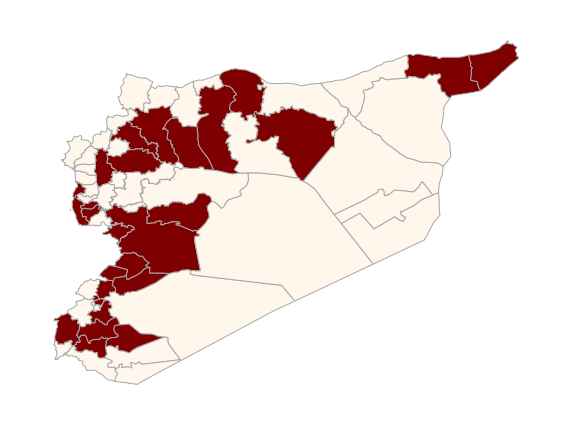

In [36]:
syria['color'] = np.random.randint(2, size=syria.shape[0])
geoplot.choropleth(
    syria, hue=syria['color'],
    cmap='OrRd', figsize=(10, 10),edgecolor='darkgray'
)

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1])